In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from datetime import datetime

In [68]:
dataset = pd.read_csv('acel.csv')

In [74]:
parc_data_train = 0.8
andando = dataset.loc[dataset['atividade'] == 'A']
split = int(len(andando)*parc_data_train)
train_andando = andando[:split]
teste_andando = andando[split:]
parado = dataset.loc[dataset['atividade'] == 'D']
split = int(len(parado)*parc_data_train)
train_parado = parado[:split]
teste_parado = parado[split:]
treino = pd.concat([train_andando, train_parado])
teste = pd.concat([teste_andando, teste_parado])

In [82]:
testY = teste[['atividade', "pessoa"]]


In [ ]:
testY = testY.replace({'A': 0, 'D': 1})
testY = testY.values
teste = teste['acelerômetro'].values

In [23]:
treino = treino.fillna(0)
label = treino['atividade']
treino = treino['acelerômetro'].values
label = label.replace({'A': 0, 'D': 1})
label = label.values

In [40]:
Npred = 2
Npontos = 60
features = 2
print(label[0])

0


In [29]:
def cria_IN_OUT(data, janela, features):
    OUT_indices = np.arange(janela, len(data), janela)
    OUT = data[OUT_indices]
    IN = data[range(janela*len(OUT))]
    IN = np.reshape(IN, (len(OUT), janela, features))
    IN_final = IN[:,:-Npred,:]
    return IN_final
trainX = cria_IN_OUT(treino, Npontos, 1)
trainY = cria_IN_OUT(label, Npontos, 1)
testX = cria_IN_OUT(teste, Npontos, 1)
testY = cria_IN_OUT(testY, Npontos, 1)

ValueError: cannot reshape array of size 3480 into shape (1,60,1)

In [63]:
for i in range(0, 257, 1):
    teste = False
    for x in range(0, 58, 1):
        if teste == False:
            teste = trainY[i][x]
        else:
            if teste == trainY[i][x]:
                print('Errado, posição %.0f e %.0f' % (i,x))
trainY[140]

Errado, posição 140 e 18
Errado, posição 140 e 19
Errado, posição 140 e 20
Errado, posição 140 e 21
Errado, posição 140 e 22
Errado, posição 140 e 23
Errado, posição 140 e 24
Errado, posição 140 e 25
Errado, posição 140 e 26
Errado, posição 140 e 27
Errado, posição 140 e 28
Errado, posição 140 e 29
Errado, posição 140 e 30
Errado, posição 140 e 31
Errado, posição 140 e 32
Errado, posição 140 e 33
Errado, posição 140 e 34
Errado, posição 140 e 35
Errado, posição 140 e 36
Errado, posição 140 e 37
Errado, posição 140 e 38
Errado, posição 140 e 39
Errado, posição 140 e 40
Errado, posição 140 e 41
Errado, posição 140 e 42
Errado, posição 140 e 43
Errado, posição 140 e 44
Errado, posição 140 e 45
Errado, posição 140 e 46
Errado, posição 140 e 47
Errado, posição 140 e 48
Errado, posição 140 e 49
Errado, posição 140 e 50
Errado, posição 140 e 51
Errado, posição 140 e 52
Errado, posição 140 e 53
Errado, posição 140 e 54
Errado, posição 140 e 55
Errado, posição 140 e 56
Errado, posição 140 e 57


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [26]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_units, input_shape=input_shape,activation=activation[0], return_sequences=True))
  model.add(tf.keras.layers.Dense(units=32, activation=activation[0]))
  model.add(tf.keras.layers.Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])
  return model

In [27]:
model = cria_LSTM(hidden_units=60, dense_units=1, input_shape=(58,1), activation=['relu', 'sigmoid'])
history = model.fit(trainX, trainY, epochs = 40, batch_size = 10, verbose = 1,  validation_data=(testX, testY))


Epoch 1/40
29/29 [==============================] - 1s 13ms/step - loss: 15.7120 - accuracy: 0.5090 - val_loss: 8.1644 - val_accuracy: 0.5328
Epoch 2/40
29/29 [==============================] - 0s 8ms/step - loss: 14.9908 - accuracy: 0.4589 - val_loss: 12.9182 - val_accuracy: 0.4840
Epoch 3/40
29/29 [==============================] - 0s 7ms/step - loss: 8.8710 - accuracy: 0.5118 - val_loss: 5.7821 - val_accuracy: 0.5084
Epoch 4/40
29/29 [==============================] - 0s 7ms/step - loss: 21.2513 - accuracy: 0.5051 - val_loss: 99.2878 - val_accuracy: 0.4914
Epoch 5/40
29/29 [==============================] - 0s 8ms/step - loss: 241.8445 - accuracy: 0.5256 - val_loss: 406.6203 - val_accuracy: 0.4988
Epoch 6/40
29/29 [==============================] - 0s 7ms/step - loss: 259.6982 - accuracy: 0.4434 - val_loss: 93.6316 - val_accuracy: 0.4995
Epoch 7/40
29/29 [==============================] - 0s 8ms/step - loss: 44.8516 - accuracy: 0.4797 - val_loss: 105.9212 - val_accuracy: 0.5015
Epoc

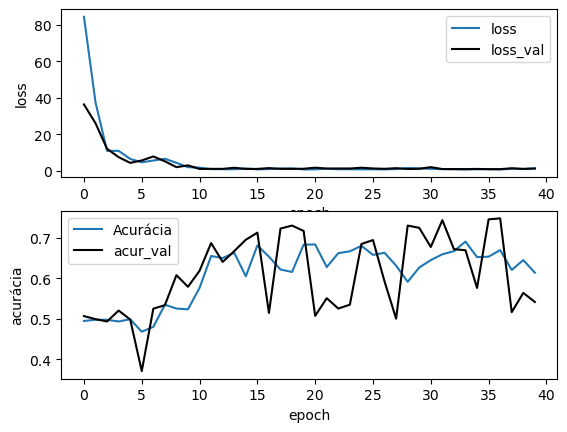

In [18]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'k')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'loss_val'])
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'k')
plt.ylabel('acurácia')
plt.xlabel('epoch')
plt.legend(['Acurácia', 'acur_val'])

In [11]:
y_pred=model.predict(testX)

2/2 [==============================] - 0s 6ms/step


In [12]:
accuracy = model.evaluate(testX, testY)
print('Acurácia: %.2f' % (accuracy[1]*100))
print('Loss: %.2f' % (accuracy[0]))


2/2 [==============================] - 0s 8ms/step - loss: 1.8514 - accuracy: 0.6748
Acurácia: 67.48
Loss: 1.85


In [13]:
print('data pred = ', np.concatenate((testY, np.around(y_pred)), axis=1))

data pred =  [[[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [0.]
  [0.]
  [0.]]]


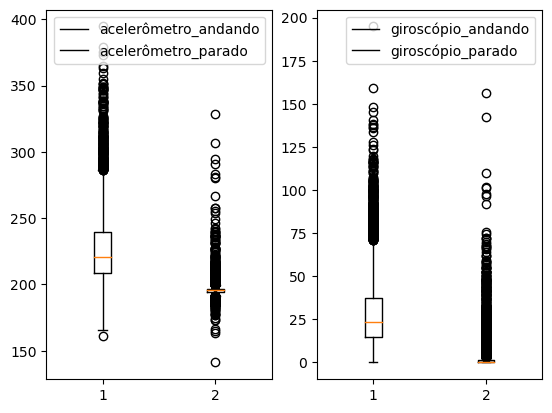

In [14]:
plt.subplot(1,2,1)
plt.boxplot([train_andando['acelerômetro'], train_parado['acelerômetro']])
plt.legend(['acelerômetro_andando', 'acelerômetro_parado'])
plt.subplot(1,2,2)
plt.boxplot([train_andando['giroscópio'], train_parado['giroscópio']])
plt.legend(['giroscópio_andando', 'giroscópio_parado',])


In [15]:
print(trainX.shape)

(257, 58, 2)


In [16]:
treino

array([[2.09931852e+02, 2.13031198e+01],
       [2.36926222e+02, 3.13030374e+01],
       [2.53333864e+02, 2.23493239e+01],
       ...,
       [1.89217666e+02, 4.47426326e-02],
       [1.88865971e+02, 5.75659437e-02],
       [1.89071250e+02, 5.86306283e-02]])